## Loading MNIST dataset

In [14]:
import pandas as pd
train = pd.read_csv("../Datasets/MNIST/train.csv")
test = pd.read_csv("../Datasets/MNIST/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
import numpy as np
x = np.array(train.drop('label', axis = 1))
y = np.array(train.label)
print(x.shape, y.shape)

(42000, 784) (42000,)


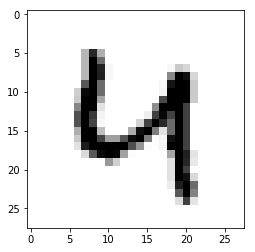

Label:  4


In [41]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = x[420]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()
print("Label: ", y[420])

In [42]:
shuffled_indices = np.random.permutation(x.shape[0])
x_train, y_train = x[shuffled_indices], y[shuffled_indices]

## A simple binary classifier
### "4- detector", (4 or not-4)

In [46]:
y_train_4 = (y_train == 4) #true when label is 4, false otherwise

In [73]:
#To remove sklearn's Future warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [69]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train_4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
sgd_clf.predict([some_digit])

array([ True])

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)
for train_index, test_index in skfolds.split(x_train, y_train_4):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_4[train_index])
    x_test_fold = x_train[test_index]
    y_test_fold = (y_train_4[test_index])
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9126490964931077
0.98
0.9650689334952497


In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_4, cv = 3, scoring = "accuracy")

array([0.9126491 , 0.98      , 0.96506893])

In [74]:
#Dumb Classifier:

from sklearn.base import BaseEstimator

class Never4Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype = bool)

nvr4clf = Never4Classifier()
cross_val_score(nvr4clf, x_train, y_train_4, cv = 3, scoring = "accuracy")

array([0.90157143, 0.90442857, 0.90314286])

In [76]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_4, cv = 3)

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_4, y_train_pred)

array([[36542,  1386],
       [  606,  3466]], dtype=int64)

In [88]:
from sklearn.metrics import precision_score, recall_score

print("Classifier is correct {}% of the time".format(precision_score(y_train_4, y_train_pred)*100))
print("Classifier detects {}% of the 4s".format(recall_score(y_train_4, y_train_pred)*100))

Classifier is correct 71.43446001648805% of the time
Classifier detects 85.11787819253438% of the 4s


In [89]:
from sklearn.metrics import f1_score

f1_score(y_train_4, y_train_pred)

0.7767817122366653